In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

creating a column overweight based on BMI range

In [3]:
df['overweight'] = 0
highBmi = df['weight']/((df['height']/100) ** 2) > 25
df.loc[highBmi, 'overweight'] = 1

Normalizing column Cholesterol And Gluc

In [4]:
df.loc[df['cholesterol']== 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] >1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] >1, 'gluc'] = 1

In [10]:
def draw_cat_plot():
    # 5
    df_cat = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    # 6
    df_cat = pd.melt(df, id_vars = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio'],  value_vars = df_cat, var_name = 'variable', value_name = 'value')

    # 7
    g = sns.catplot(x = 'variable', hue = 'value', col = 'cardio', kind = 'count', data = df_cat, height = 4, aspect = 1)

    # 8
    g.set_titles("Cardio = {col_name}")
    plt.tight_layout()
    fig = plt.show()
    # 9
    
    return fig

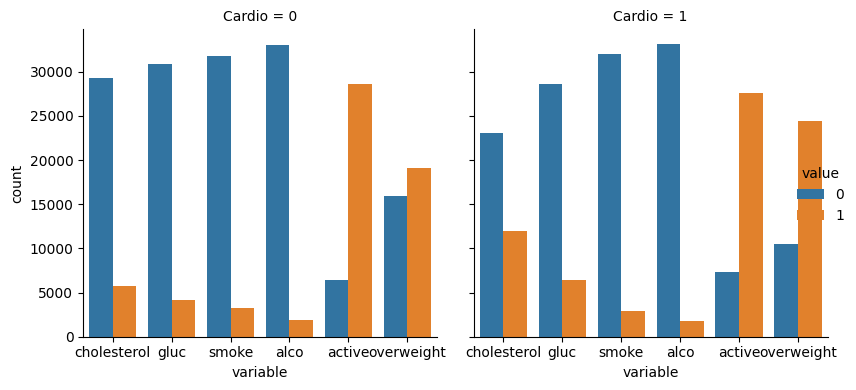

In [11]:
draw_cat_plot()

In [14]:
def draw_heat_map():
    # 11
    df_heat = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025))& (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # 14
    fig, ax = plt.subplots(figsize=(10, 8))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Heatmap', fontsize=16)
    fig = plt.show()
    # 16
    
    return fig

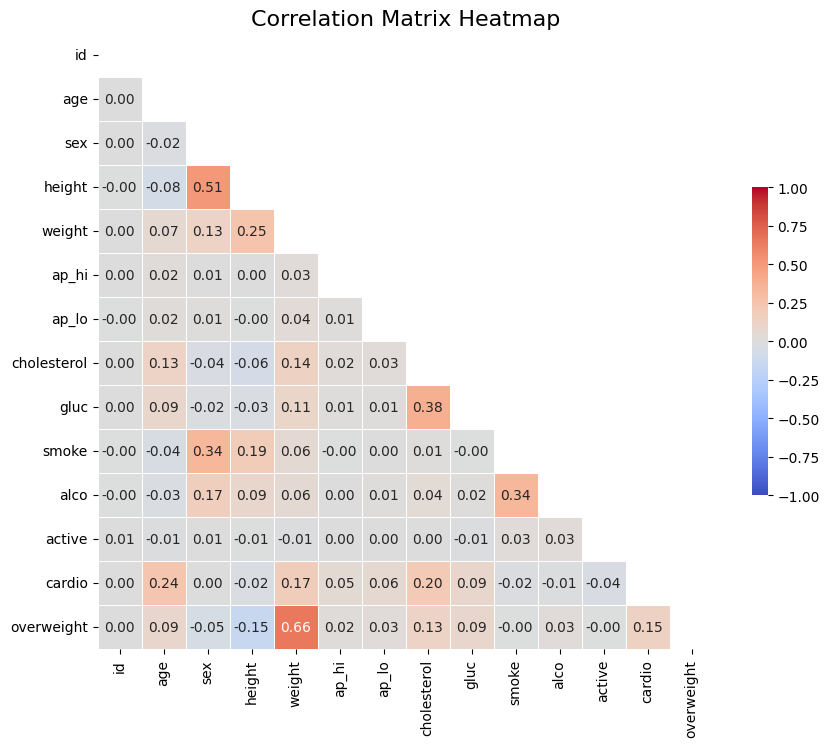

In [15]:
draw_heat_map()